In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from peakdetect import peakdet
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
realdata=np.fromfile("200ms/200ms_500MHz.bin",'u2')

In [5]:
N=len(realdata)
Nchunks=100
ChunkSize=int(N/Nchunks)

In [6]:
subdata=[]
meanz=[{} for i in range(Nchunks)]
#refine=[{} for i in range(Nchunks)]
for i in range(Nchunks):
    subdata.append(realdata[i*ChunkSize:(i+1)*ChunkSize])
    meanz[i]=np.mean(subdata[i])
#    refine=subdata[i]-meanz[i]

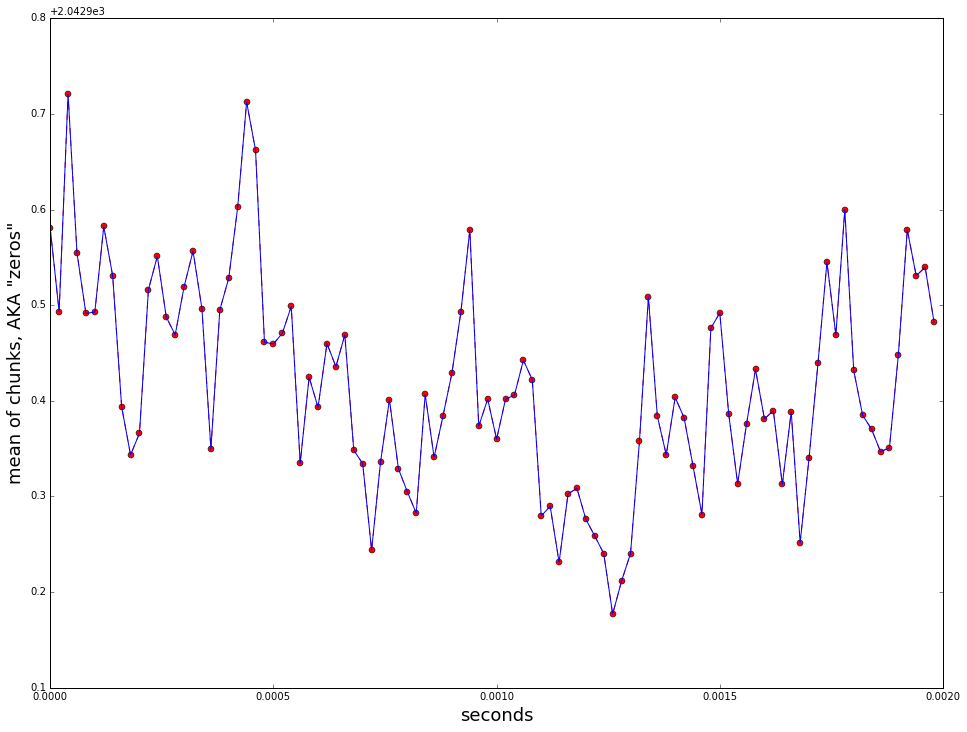

In [113]:
figure (figsize=(16,12))
t=arange(Nchunks)*(2.0e-5)
y=meanz
plot(t,y,'ro--')
plot(t,meanz)#since mean is almost the same for each chunk, we can take the mean of means and subtract that from subdata
plt.xlabel('seconds', fontsize=18)
plt.ylabel('mean of chunks, AKA "zeros"', fontsize=18)

In [7]:
finmean=np.mean(meanz)
print (finmean)

2043.3178983


In [ ]:
newreals= realdata - finmean

In [106]:
refinsubdata=[]
for i in range(Nchunks):
    refinsubdata.append(realdata[i*ChunkSize:(i+1)*ChunkSize])

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [105]:
print (refinsubdata)

[array([3002, 2071, 1095, ..., 1392, 1040, 1896], dtype=uint16), array([2942, 2880, 1819, ..., 2305, 1226, 1130], dtype=uint16), array([2146, 3035, 2717, ..., 2997, 2050, 1091], dtype=uint16), array([1288, 2397, 3089, ..., 2953, 2866, 1799], dtype=uint16), array([1016, 1476, 2620, ..., 2171, 3041, 2698], dtype=uint16), array([1567, 1011, 1699, ..., 1302, 2408, 3085], dtype=uint16), array([2497, 1363, 1048, ..., 1016, 1486, 2631], dtype=uint16), array([3060, 2259, 1195, ..., 1553, 1013, 1718], dtype=uint16), array([2826, 2981, 2011, ..., 2478, 1348, 1057], dtype=uint16), array([1960, 2969, 2844, ..., 3057, 2234, 1184], dtype=uint16), array([1167, 2210, 3057, ..., 2839, 2968, 1988], dtype=uint16), array([1072, 1325, 2457, ..., 1981, 2978, 2835], dtype=uint16), array([1739, 1014, 1530, ..., 1178, 2227, 3061], dtype=uint16), array([2658, 1517, 1011, ..., 1065, 1342, 2469], dtype=uint16), array([3085, 2435, 1317, ..., 1727, 1009, 1542], dtype=uint16), array([2680, 3046, 2203, ..., 2652, 150

In [87]:
standev=[{} for i in range(Nchunks)]   #failed
variance=[{} for i in range(Nchunks)]
refined=[{} for i in range(Nchunks)]
for i in range(Nchunks):
    standev[i]=subdata[i].std

In [68]:
newarr = (subdata[i]-meanz[i])   #failed

In [29]:
mean=subdata[1].mean()
rms=np.sqrt(subdata[1].var())
#Ns=4096
#Na=131835
#print ('mean=',mean)
#print ('standard deviation=',rms)
#print ('total length=',N, Na*Ns)
dt=1.0/2.7e9 #2.5 GSample/s
nuX=500.69158364*1e6

In [18]:
figure (figsize=(16,12))
plugs=arange(0, 1000)
mun=np.mean(plugs)
why=(mun+2*sin(meanz))
up=np.var(why)
t=arange(1)*dt

(100, 100)

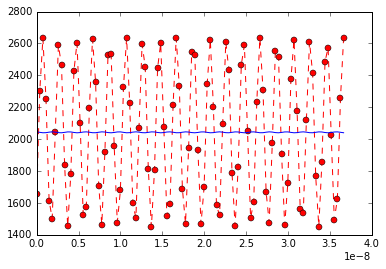

In [11]:
# first let's check weird ordering, by taking firt 100 samples

t=arange(100)*dt #chunk size
y=realdata[:100]
plot(t,y,'ro--')
plot(t,mean+np.sqrt(2)*rms*(sin(2+nuX*t*np.pi*2)))
len (t), len(meanz)
#plot(t,meanz)

In [109]:
from peekdetect import peakdetect_sine
import peakutils
from peakutils.plot import plot as plut

[ 5 10 16 21 27 32 37 43 48 54 59 64 70 75 81 86 91 97]


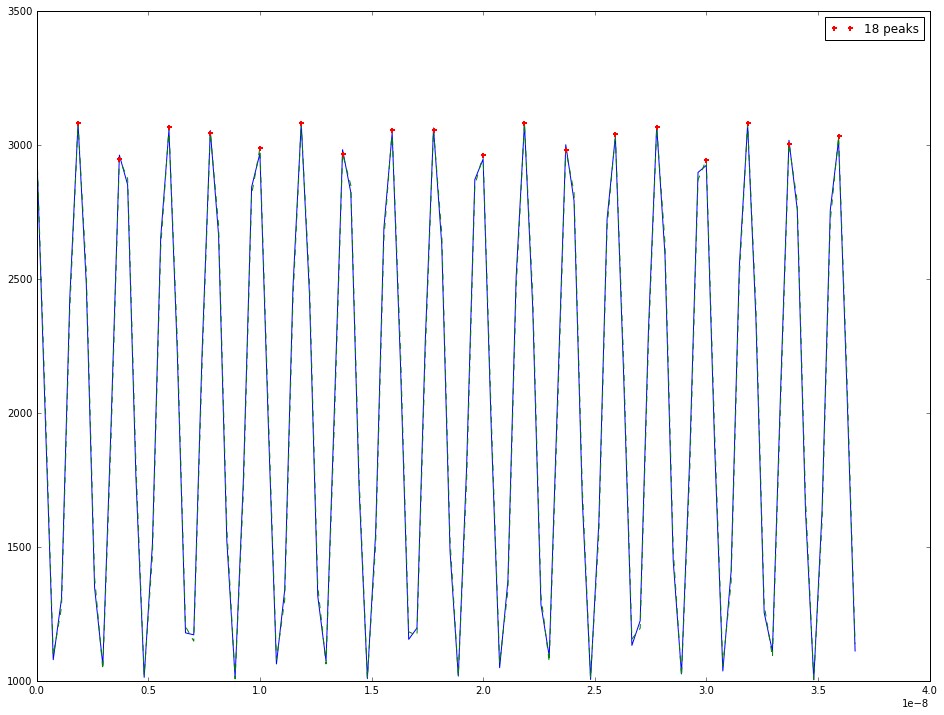

In [110]:
sr=np.sqrt(mean+np.sqrt(2)*rms*(sin(2+nuX*t*np.pi*2)))
figure (figsize=(16,12))
t=arange(100)*dt #chunk size
y=realdata[:100]
indexes=peakutils.indexes(sr)
plot(t,mean+np.sqrt(2)*rms*(sin(2+nuX*t*np.pi*2)))
print(indexes)
plut(t,y,indexes)

In [111]:
get=(y[indexes])
meanampl=np.mean(get)
print (meanampl)

3027.72222222
